In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab_data = pd.read_csv('data/ab_data.zip')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [3]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [4]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [5]:
# агрегированные данные за день
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


$conv_{t} = \frac{N_{t}^{+}}{N_{t}} \times 100\ %$

$\(N_{t}^{+}\)$ — количество посетителей сайта, выполнивших целевое действие в день \(t\);
$\(N_t\)$ — общее количество посетителей сайта в день \(t\);
$\(conv_t\)$ — конверсия в день \(t\).

In [10]:
daily_data['conversion'] = (daily_data['converted'] / daily_data['users_count']) * 100
daily_data

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


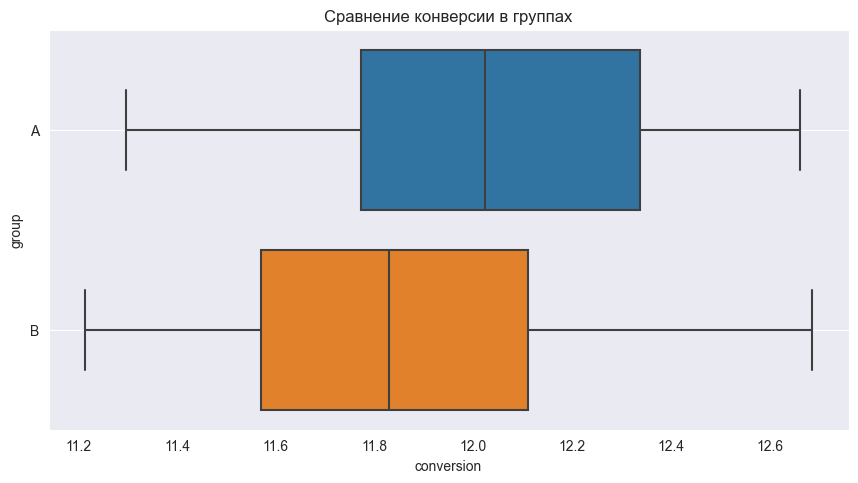

In [11]:
# конверсия по группам

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax)
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [12]:
# вычислим средний и медианный показатель конверсии в контрольной и тестовой группе и умножим результат на 100 (получим результат в процентах)
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


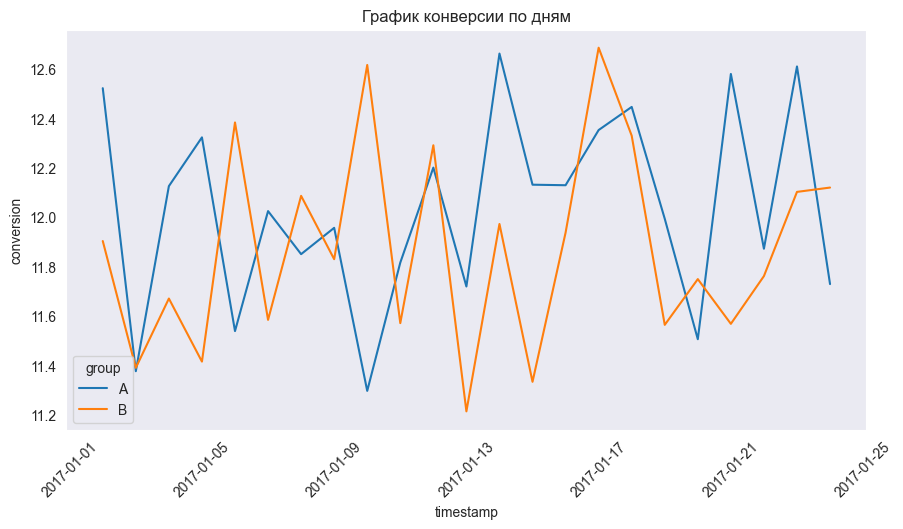

In [13]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group',
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [14]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

C:\Users\Sergey\AppData\Local\Temp\ipykernel_32456\906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


Кумулятивную сумму можно записать в виде рекурсивной формулы:

$\[S_{t}=S_{t-1}+x_{t}\]$

$\(x_t\)$ — значение показателя в день $\(t\)$;
$\(S_t\)$ — значение суммы в день $\(t\)$.

In [15]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


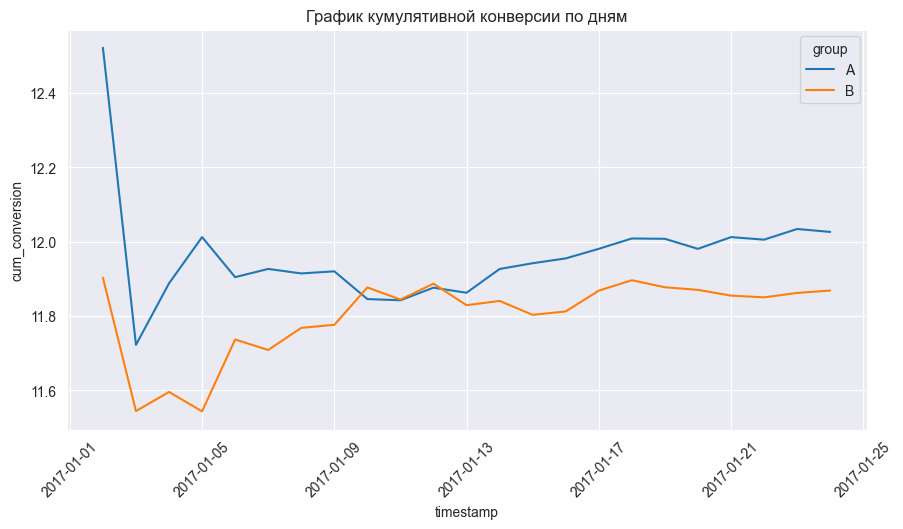

In [16]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [23]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.zip')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.zip')

In [24]:
sample_a

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A
...,...,...,...,...,...
61566,2020-11-23,9.986289e+08,0,0,A
61567,2020-11-23,9.989196e+08,0,0,A
61568,2020-11-23,9.990631e+08,0,0,A
61569,2020-11-23,9.994210e+07,0,0,A


In [25]:
sample_b

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B
...,...,...,...,...,...
61378,2020-11-23,9.965675e+08,0,0,B
61379,2020-11-23,9.970803e+07,0,0,B
61380,2020-11-23,9.984814e+08,0,0,B
61381,2020-11-23,9.991118e+08,0,0,B


In [26]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')
sample_a.info()
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61383 non-null  datetime64[ns]
 1   cid           61383 non-null  float64       
 2   transactions  61383 non-null  int64         
 3   revenue       61383 non-null  int64         
 4   group         61383 non-null  object        
dty

In [27]:
# агрегированные данные за день
sample_a_daily = sample_a.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index()
sample_a_daily.head()

,date,cid,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [28]:
sample_b_daily = sample_b.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index()
sample_b_daily.head()

,date,cid,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [30]:
sample_a_daily.loc[:, 'cum_cid_count'] = sample_a_daily['cid'].cumsum()
sample_a_daily.loc[:, 'cum_transactions_sum'] = sample_a_daily['transactions'].cumsum()
sample_a_daily.loc[:, 'cum_revenue_sum'] = sample_a_daily['revenue'].cumsum()
display(sample_a_daily)

,date,cid,transactions,revenue,cum_cid_count,cum_transactions_sum,cum_revenue_sum
0,2020-11-06,2576,16,1577279,2576,16,1577279
1,2020-11-07,2704,23,1721886,5280,39,3299165
2,2020-11-08,3354,25,846051,8634,64,4145216
3,2020-11-09,3234,18,708830,11868,82,4854046
4,2020-11-10,3022,29,826984,14890,111,5681030
5,2020-11-11,3218,19,1209656,18108,130,6890686
6,2020-11-12,3467,19,607839,21575,149,7498525
7,2020-11-13,3676,36,1338816,25251,185,8837341
8,2020-11-14,3372,30,2659277,28623,215,11496618
9,2020-11-15,3881,27,1189970,32504,242,12686588


In [31]:
sample_b_daily.loc[:, 'cum_cid_count'] = sample_b_daily['cid'].cumsum()
sample_b_daily.loc[:, 'cum_transactions_sum'] = sample_b_daily['transactions'].cumsum()
sample_b_daily.loc[:, 'cum_revenue_sum'] = sample_b_daily['revenue'].cumsum()
display(sample_b_daily)

,date,cid,transactions,revenue,cum_cid_count,cum_transactions_sum,cum_revenue_sum
0,2020-11-06,2499,19,996645,2499,19,996645
1,2020-11-07,2804,19,555499,5303,38,1552144
2,2020-11-08,3291,24,3044842,8594,62,4596986
3,2020-11-09,3062,25,1285836,11656,87,5882822
4,2020-11-10,3072,30,2414726,14728,117,8297548
5,2020-11-11,3208,22,3555727,17936,139,11853275
6,2020-11-12,3494,25,915653,21430,164,12768928
7,2020-11-13,3606,37,1703475,25036,201,14472403
8,2020-11-14,3276,34,2369998,28312,235,16842401
9,2020-11-15,3919,27,1147144,32231,262,17989545


In [33]:
sample_a_daily['cum_conversion'] = (sample_a_daily['cum_transactions_sum'] / sample_a_daily['cum_cid_count']) * 100
sample_b_daily['cum_conversion'] = (sample_b_daily['cum_transactions_sum'] / sample_b_daily['cum_cid_count']) * 100

sample_a_daily['cum_chek'] = sample_a_daily['cum_revenue_sum'] / sample_a_daily['cum_transactions_sum']
sample_b_daily['cum_chek'] = sample_b_daily['cum_revenue_sum'] / sample_b_daily['cum_transactions_sum']

display(sample_a_daily)
display(sample_b_daily)

,date,cid,transactions,revenue,cum_cid_count,cum_transactions_sum,cum_revenue_sum,cum_conversion,cum_chek
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.917355


,date,cid,transactions,revenue,cum_cid_count,cum_transactions_sum,cum_revenue_sum,cum_conversion,cum_chek
0,2020-11-06,2499,19,996645,2499,19,996645,0.760304,52455.000000
1,2020-11-07,2804,19,555499,5303,38,1552144,0.716576,40845.894737
2,2020-11-08,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
3,2020-11-09,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
4,2020-11-10,3072,30,2414726,14728,117,8297548,0.794405,70919.213675
5,2020-11-11,3208,22,3555727,17936,139,11853275,0.774978,85275.359712
6,2020-11-12,3494,25,915653,21430,164,12768928,0.765282,77859.317073
7,2020-11-13,3606,37,1703475,25036,201,14472403,0.802844,72002.004975
8,2020-11-14,3276,34,2369998,28312,235,16842401,0.830037,71669.791489
9,2020-11-15,3919,27,1147144,32231,262,17989545,0.812882,68662.385496


In [36]:
display(round(sample_a_daily['cum_conversion'].mean(), 2))
display(round(sample_b_daily['cum_conversion'].mean(), 2))

0.71

0.76

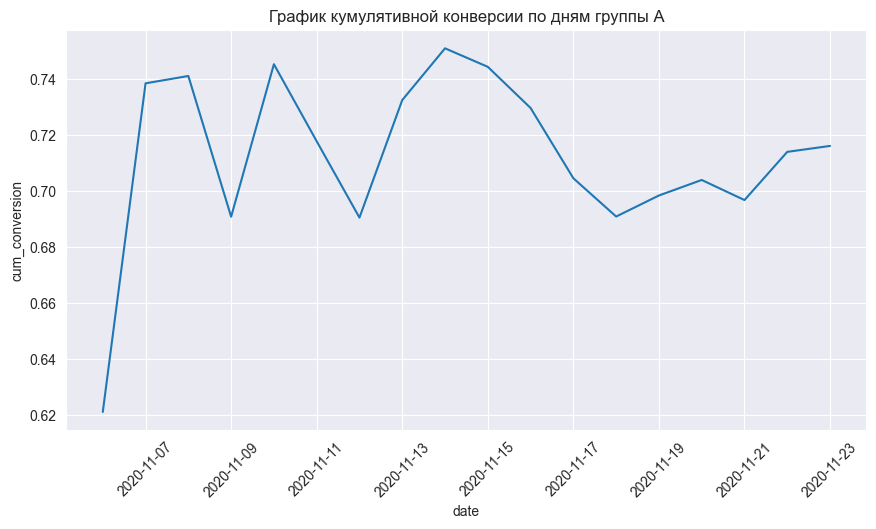

In [38]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=sample_a_daily) # , hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням группы А')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

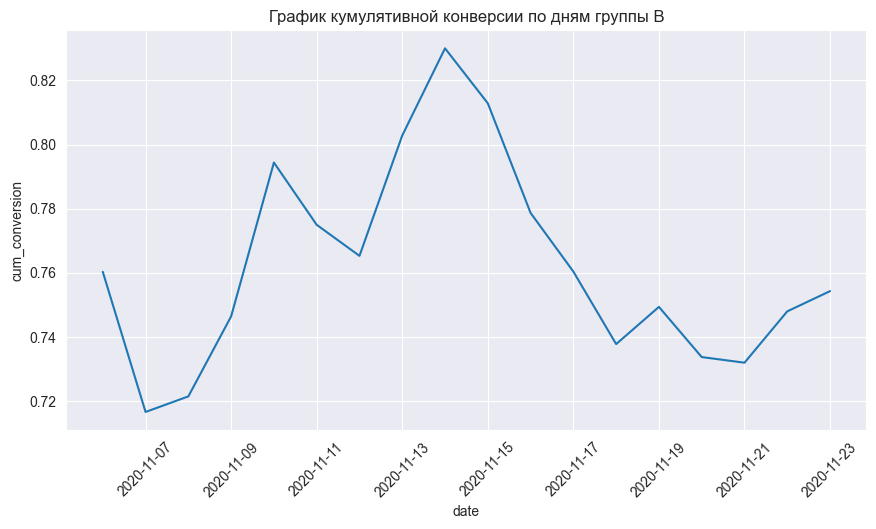

In [41]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=sample_b_daily) # , hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням группы B')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

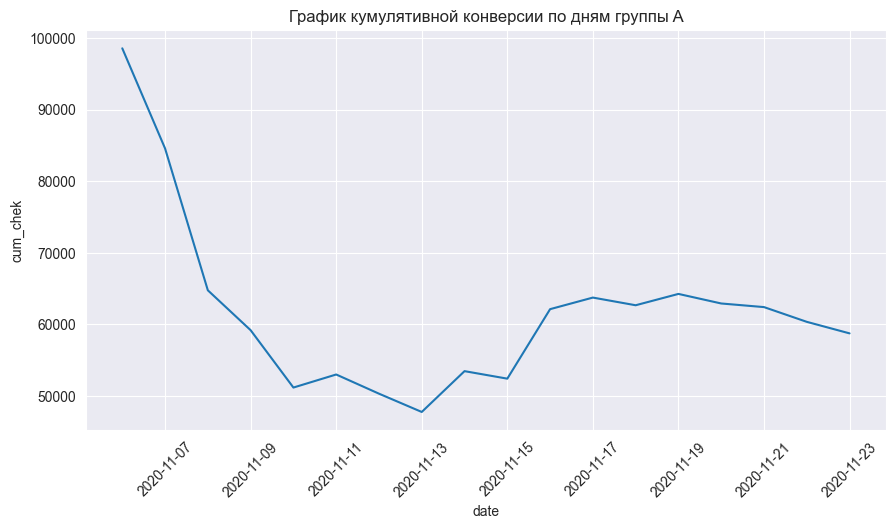

In [44]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_chek', data=sample_a_daily, ax=ax) # , hue='group')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням группы A')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

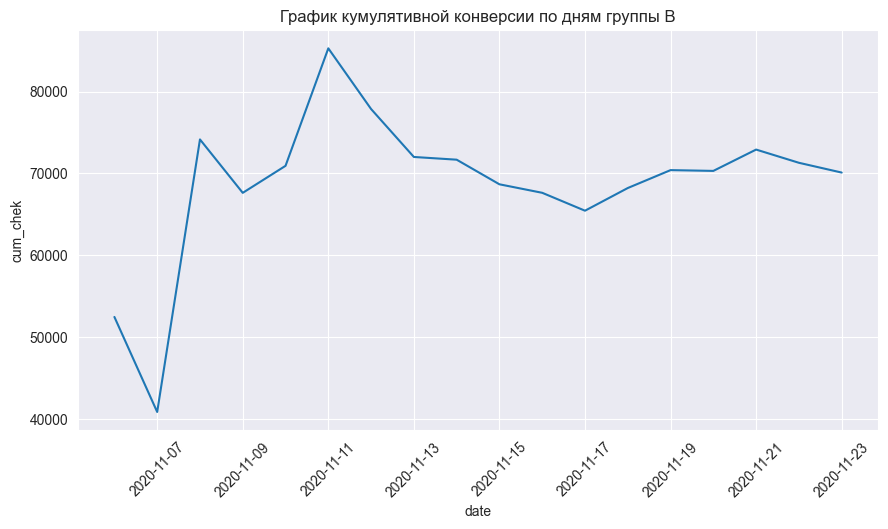

In [45]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_chek', data=sample_b_daily, ax=ax) # , hue='group')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням группы B')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [47]:
sample_a_daily['group'] = 'A'
sample_b_daily['group'] = 'B'
sample_daily = pd.concat([sample_a_daily, sample_b_daily]).reset_index(drop=True)
sample_daily

,date,cid,transactions,revenue,cum_cid_count,cum_transactions_sum,cum_revenue_sum,cum_conversion,cum_chek,group
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500,A
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359,A
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000,A
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927,A
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450,A
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923,A
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141,A
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811,A
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860,A
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.917355,A


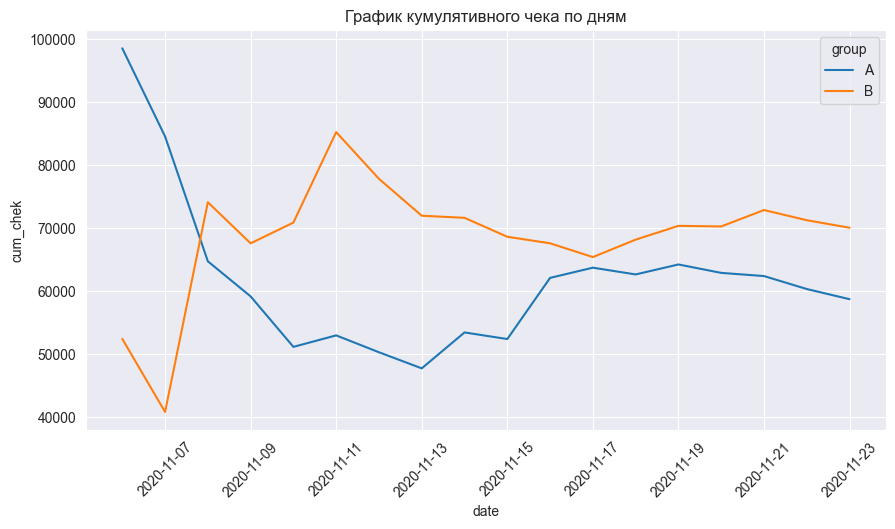

In [48]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_chek', data=sample_daily, ax=ax, hue='group')
# задаём подпись к графику
ax.set_title('График кумулятивного чека по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [49]:
from statsmodels.stats.proportion import proportions_ztest

In [71]:
# сгруппируем данные по признаку группы и рассчитаем количество «успехов» (сумма по столбцу converted) и общее количество наблюдений (количество непустых значений в столбце converted) для каждой группы
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)
display(converted_piv['sum'])
display(converted_piv['count'])

,sum,count
group,,
A,17467,145241
B,17238,145241


group
A    17467
B    17238
Name: sum, dtype: int64

group
A    145241
B    145241
Name: count, dtype: int64

In [51]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


Мы проводим A/B-тест, чтобы оценить, влияет ли тема оформления на привлекательность сайта для пользователя. Гипотеза заключается в том, что тёмная тема более привлекательная для наших посетителей, поэтому их сильнее заинтересует наш сайт, следовательно, они проведут на нём больше времени. Уровень значимости равен 5 %.

In [54]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


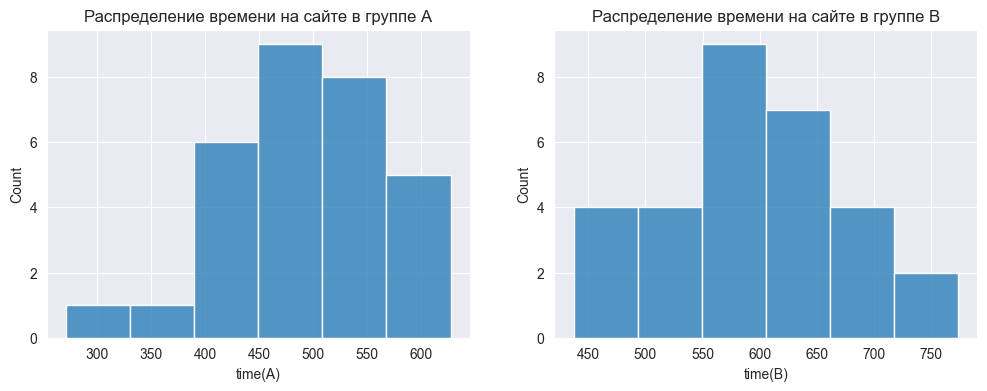

In [55]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

Гистограммы напоминают нормальное распределение. Давайте проверим гипотезу о нормальности обоих распределений с помощью критерия Шапиро-Уилка. Для этого используем функцию shapiro() из модуля scipy.stats:

In [56]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


Итак, распределение в обеих группах нормальное, а значит, мы можем воспользоваться T-тестом для того, чтобы сравнить среднее время посещения сайта в группах.

Применим T-тест для сравнения средних — функцию ttest_ind() из модуля scipy.stats. Обратите внимание, что левосторонняя альтернативная гипотеза в модуле scipy указывается в параметре alternative как 'less' (правосторонняя — 'greater’):

In [57]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'],
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


In [58]:
display(sample_a_daily)

,date,cid,transactions,revenue,cum_cid_count,cum_transactions_sum,cum_revenue_sum,cum_conversion,cum_chek,group
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500,A
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359,A
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000,A
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927,A
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450,A
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923,A
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141,A
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811,A
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860,A
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.917355,A


In [72]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А ниже, чем конверсия в группе B'
alpha = 0.1 # уровень значимости

c = [sample_a_daily['transactions'].sum(), sample_b_daily['transactions'].sum()]
n = [sample_a_daily['cid'].sum(), sample_b_daily['cid'].sum()]
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=c, #число "успехов"
    nobs=n, #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))


p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [65]:
sample_a_daily['cid'].sum() + sample_b_daily['cid'].sum()

122954

In [66]:
sample_a_daily['transactions'].sum() + sample_b_daily['transactions'].sum()

904

In [73]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(sample_a_daily['revenue'])
shapiro_result_b = shapiro(sample_b_daily['revenue'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.48
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [74]:
from scipy.stats import mannwhitneyu

H0 = 'равенство ежедневных средних чеков'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B'
alpha = 0.1
_, p_value = mannwhitneyu(
    sample_a_daily['revenue'],
    sample_b_daily['revenue'],
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))


p-value:  0.12
Принимаем нулевую гипотезу. равенство ежедневных средних чеков


In [75]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [76]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

In [77]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (12180, 20020)


In [87]:
z_crit = round(-norm.ppf(0.1/2),2)
sigma = 2.4
n = 64

In [88]:
eps = z_crit * sigma/(n ** 0.5)
eps

0.49199999999999994

In [89]:

lower_bound = 12.35 - eps # левая (нижняя) граница
upper_bound = 12.35 + eps # правая (верхняя) граница

confidence_interval = (round(lower_bound,2), round(upper_bound,2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval))


Доверительный интервал: (11.86, 12.84)


Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, а выборочное стандартное отклонение равно 400 рублей.

Для оценки управляющий хочет построить доверительный интервал с надёжностью в 95 %.

Давайте поможем управляющему, решив несколько задачек с помощью Python.

In [91]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [92]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [93]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


In [94]:
n = 25  # размер выборки
k = n - 1  # число степеней свободы
x_mean = 3540  # выборочное среднее
x_std = 1150  # выборочное стандартное отклонение
gamma = 0.90  # уровень надёжности
alpha = 1 - gamma  # уровень значимости

from scipy.stats import t
t_crit = -t.ppf(alpha / 2, k)  # t-критическое
eps = t_crit * x_std / (n ** 0.5)  # погрешность
lower_bound = x_mean - eps  # левая (нижняя) граница
upper_bound = x_mean + eps  # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound))  # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval))  # выводим результат

Доверительный интервал: (3146, 3934)


In [95]:
ab_data = pd.read_csv('data/ab_data.zip')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [96]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [97]:
def proportions_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


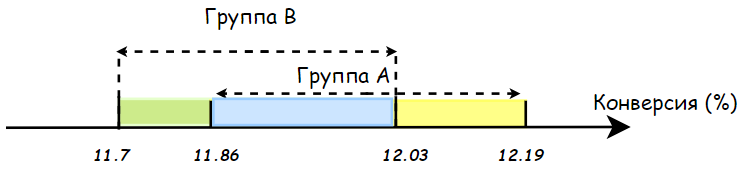

In [101]:
conf_interval_a = proportions_conf_interval(
    n=a_data['user_id'].count(), # размер выборки
    x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
    n=b_data['user_id'].count(), # размер выборки
    x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

from IPython import display
display.Image('data/dst-eda-5-33.png')
# Доверительный интервал для конверсии группы А: (11.86, 12.19)
# Доверительный интервал для конверсии группы B: (11.7, 12.03)

 Создадим функцию diff_proportions_conf_interval() со следующими аргументами: n — список из размеров выборки для групп А и B соответственно, xp — список из выборочных пропорций для групп А и B соответственно и gamma — уровень надёжности (по умолчанию он равен 0.95). Функция будет возвращать кортеж из вычисленных границ доверительного интервала разницы конверсий, умноженных на 100 % и округлённых до второго знака после запятой.

In [102]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [103]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

# Доверительный интервал для разности конверсий: (-0.39, 0.08)

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [109]:
conf_interval_a = proportions_conf_interval(
    n=1000, # размер выборки
    x_p=0.05, # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))


Доверительный интервал для конверсии группы А: (3.65, 6.35)


In [110]:
n = [45, 50]
# выборочная пропорция групп A и B
xp = [0.045, 0.05]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-8.05, 9.05)
